<a href="https://colab.research.google.com/github/riya1606/NLP_Resume_Parser/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:
import spacy
import pickle
import random
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import math
import nltk
from textblob import TextBlob as tb
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
data1 = pd.read_csv("/content/grive/MyDrive/nlp_review/UpdatedResumeDataSet.csv")

In [ ]:
infile = open('/content/grive/MyDrive/nlp_review/train_data.pkl','rb')
train_data = pickle.load(infile)

In [ ]:
train_data[0]

('Govardhana K Senior Software Engineer  Bengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/ b2de315d95905b68  Total IT experience 5 Years 6 Months Cloud Lending Solutions INC 4 Month • Salesforce Developer Oracle 5 Years 2 Month • Core Java Developer Languages Core Java, Go Lang Oracle PL-SQL programming, Sales Force Developer with APEX.  Designations & Promotions  Willing to relocate: Anywhere  WORK EXPERIENCE  Senior Software Engineer  Cloud Lending Solutions -  Bangalore, Karnataka -  January 2018 to Present  Present  Senior Consultant  Oracle -  Bangalore, Karnataka -  November 2016 to December 2017  Staff Consultant  Oracle -  Bangalore, Karnataka -  January 2014 to October 2016  Associate Consultant  Oracle -  Bangalore, Karnataka -  November 2012 to December 2013  EDUCATION  B.E in Computer Science Engineering  Adithya Institute of Technology -  Tamil Nadu  September 2008 to June 2012  https://www.indeed.com/r/Govardhana-K/b2de315d95905b68?isid=rex-

In [ ]:
nlp=spacy.blank('en')

def train_model(train_data):
  if 'ner' not in nlp.pipe_names:
    ner=nlp.create_pipe('ner')
    nlp.add_pipe(ner,last=True)

# We add labels in the NLP Pipelines
  for _, annotation in train_data:
    for ent in annotation['entities']:
      ner.add_label(ent[2])

# get names of other pipes to disable them during training
  other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
  with nlp.disable_pipes(*other_pipes):
    optimizer = nlp.begin_training()
    for itn in range(10):
      print("Starting iteration "+str(itn))
      random.shuffle(train_data)
      losses = {}
      index=0
      for text, annotations in train_data:
        # print (index)
        try:
          nlp.update(
              [text], #batch of texts
              [annotations], # batch of annotations
              drop=0.2, #dropout - make it harder to memorise 
              sgd=optimizer, #callable to update weights
              losses=losses
          )
        except Exception as e:
          pass
            # print(text)
        
      print(losses)

In [ ]:
train_model(train_data)

Starting iteration 0
{'ner': 13813.01125541016}
Starting iteration 1
{'ner': 11910.162744606016}
Starting iteration 2
{'ner': 8594.71141842938}
Starting iteration 3
{'ner': 8002.400277436953}
Starting iteration 4
{'ner': 7047.36467162879}
Starting iteration 5
{'ner': 5446.7307136759955}
Starting iteration 6
{'ner': 5751.213936769567}
Starting iteration 7
{'ner': 5101.735891955726}
Starting iteration 8
{'ner': 4341.090841356377}
Starting iteration 9
{'ner': 4443.019430409696}


In [ ]:
nlp.to_disk('nlp_model')

In [ ]:
nlp_model = spacy.load('nlp_model')

In [ ]:
train_data[1]

('Vinay Singhal New Delhi, Delhi - Email me on Indeed: indeed.com/r/Vinay-Singhal/c15261079a9b5ae7  To work in a challenging atmosphere that provides me an opportunity for learning and growth, where my professional skills combined with knowledge will make effective contribution to the growth of the company.  Willing to relocate: Anywhere  WORK EXPERIENCE  Customer Care Associate Microsoft  Convergys -  Gurgaon, Delhi NCR -  April 2018 to Present  I am handling US, UK and EU clients for the any issue faced by then related to Microsoft products.  ADDITIONAL INFORMATION  SKILLS ❖ Smart Working. ❖ Fast and keen learner. ❖ Works well within a team and also independently. ❖ Flexible and high adaptability to new approaches, people and environments. ❖ Professional approach and positive attitude. ❖ Hard working with abstract thinking. ❖ Good personal skills like photography & software issues. ❖ Good Communications Skills  https://www.indeed.com/r/Vinay-Singhal/c15261079a9b5ae7?isid=rex-download

In [ ]:
doc = nlp_model(train_data[0][0])
for ent in doc.ents:
  print(f'{ent.label_.upper():{30}}-{ent.text}')
  

NAME                          -Fenil Francis
LOCATION                      -Trichur,
EMAIL ADDRESS                 -indeed.com/r/Fenil-Francis/445e6b4cb0b43094
DESIGNATION                   -Manager
DEGREE                        -B.Com in Computer Application
COLLEGE NAME                  -Madurai Kamaraj University
GRADUATION YEAR               -2017
SKILLS                        -PROBLEM SOLVING (Less than 1 year)  ADDITIONAL INFORMATION  SKILLS &amp; ABILITIES: • Good Communication Skill • Sincere • Hard working • Leadership skill • Pleasing personality • Problem solving capability


In [ ]:
!pip install PyMuPDF


     |████████████████████████████████| 8.8 MB 22.9 MB/s 


In [ ]:
import sys, fitz
fname = '/content/grive/MyDrive/nlp_review/Alice Clark CV.pdf'
doc = fitz.open(fname)
text = ""
for page in doc:
  text = text + str(page.getText())

tx = " ".join(text.split('\n'))
print(tx)


Alice Clark  AI / Machine Learning    Delhi, India Email me on Indeed  •  20+ years of experience in data handling, design, and development  •  Data Warehouse: Data analysis, star/snow flake scema data modelling and design specific to  data warehousing and business intelligence  •  Database: Experience in database designing, scalability, back-up and recovery, writing and  optimizing SQL code and Stored Procedures, creating functions, views, triggers and indexes.  Cloud platform: Worked on Microsoft Azure cloud services like Document DB, SQL Azure,  Stream Analytics, Event hub, Power BI, Web Job, Web App, Power BI, Azure data lake  analytics(U-SQL)  Willing to relocate anywhere    WORK EXPERIENCE  Software Engineer  Microsoft – Bangalore, Karnataka  January 2000 to Present  1. Microsoft Rewards Live dashboards:  Description: - Microsoft rewards is loyalty program that rewards Users for browsing and shopping  online. Microsoft Rewards members can earn points when searching with Bing, bro

Deprecation: 'getText' removed from class 'Page' after v1.19 - use 'get_text'.


In [ ]:
doc = nlp_model(tx)
for ent in doc.ents:
  print(f'{ent.label_.upper():{30}}-{ent.text}')

NAME                          -Alice Clark
LOCATION                      -Delhi
COLLEGE NAME                  -Indian Institute of Technology – Mumbai
SKILLS                        -Machine Learning, Natural Language Processing, and Big Data Handling    ADDITIONAL INFORMATION  Professional Skills  • Excellent analytical, problem solving, communication, knowledge transfer and interpersonal  skills with ability to interact with individuals at all the levels  • Quick learner and maintains cordial relationship with project manager and team members and  good performer both in team and independent job environments  • Positive attitude towards superiors &amp; peers  • Supervised junior developers throughout project lifecycle and provided technical assistance


In [ ]:
data1['cleaned_resume'] = ''
data1.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [ ]:
print ("Displaying the distinct categories of resume:\n\n ")
print (data1['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [ ]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (data1['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


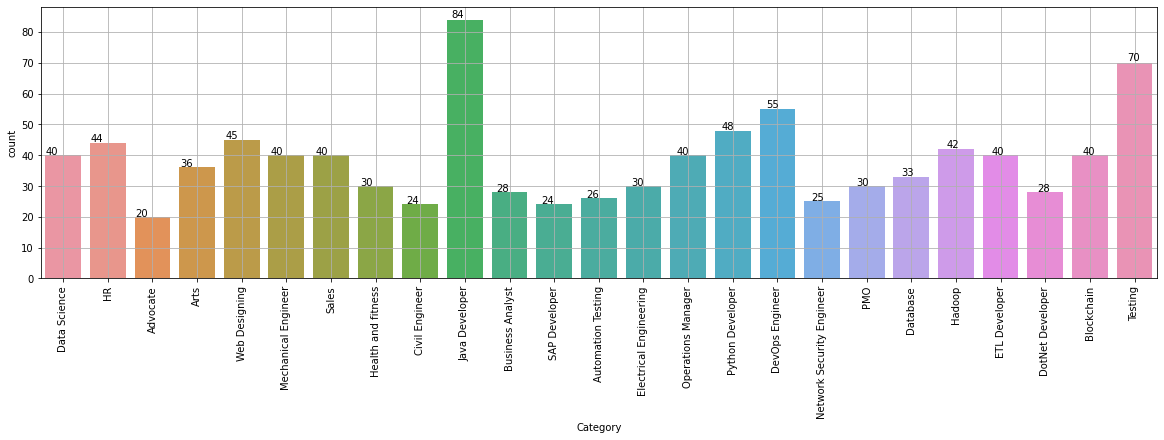

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=data1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

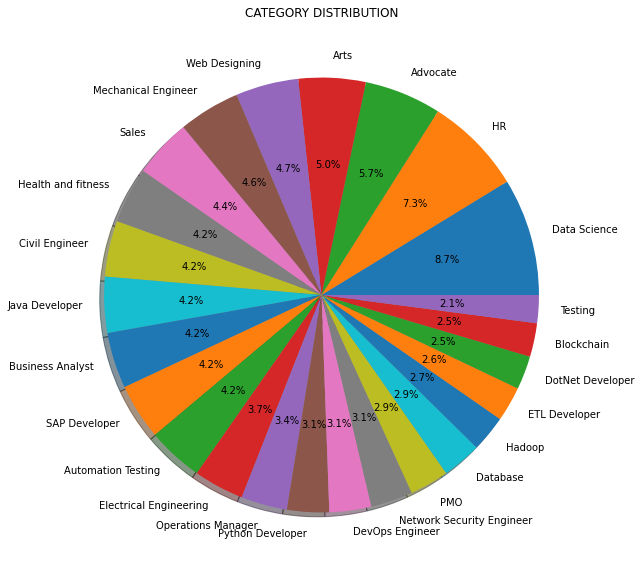

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts = data1['Category'].value_counts()
targetLabels  = data1['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [ ]:
doc1=tb(train_data[0][0])
doc2=tb(train_data[1][0])
doc3=tb(train_data[2][0])
doc4=tb(train_data[3][0])
doc5=tb(train_data[4][0])


In [ ]:
train_data[0][0]

'Fenil Francis head of operation and logistics  Trichur, Kerala - Email me on Indeed: indeed.com/r/Fenil-Francis/445e6b4cb0b43094  To succeed in an environment of growth and excellence and earn a job which provides me job satisfaction and self development and help me achieve personal as well as organization goals.  WORK EXPERIENCE  Manager  Masters equipments -  Trichur, Kerala -  May 2017 to Present  Sales Manager  Microsoft Power -  Trichur, Kerala -  May 2017 to Present  2. Microsoft Office: Microsoft Word, Microsoft Power point, Microsoft Excel  EDUCATION  B.Com in Computer Application  Madurai Kamaraj University -  Madurai, Tamil Nadu  2017  SSLC  Kerala State Board  2012  SKILLS  PROBLEM SOLVING (Less than 1 year)  ADDITIONAL INFORMATION  SKILLS &amp; ABILITIES: • Good Communication Skill • Sincere • Hard working • Leadership skill • Pleasing personality • Problem solving capability  https://www.indeed.com/r/Fenil-Francis/445e6b4cb0b43094?isid=rex-download&ikw=download-top&co=IN'

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tf(word,blob):
  return blob.words.count(word)/len(blob.words)
  ## the number of documents containing the word

def n_containing(word,bloblist):
  return sum(1 for blob in bloblist if word in blob.words)

def idf(word,bloblist):
  return math.log(len(bloblist)/(1+n_containing(word,bloblist)))

def tfidf(word,blob,bloblist):
  return tf(word,blob)*idf(word,bloblist)

In [ ]:
bloblist = [doc1,doc2,doc3,doc4,doc5]
for i, blob in enumerate(bloblist):
  print("Top resumes in the lot:")
  scores= {word: tfidf(word,blob,bloblist) for word in blob.words}
  sorted_words= sorted(scores.items(), key=lambda x:x[1], reverse=True)
  for word, score in sorted_words[:3]:
    print("\tWord: {},TF-IDF:{}".format(word,round(score,5)))
  print("\n")


Top resumes in the lot:
	Word: Trichur,TF-IDF:0.02131
	Word: Kerala,TF-IDF:0.01584
	Word: Manager,TF-IDF:0.01421


Top resumes in the lot:
	Word: ❖,TF-IDF:0.05274
	Word: Skills,TF-IDF:0.02637
	Word: Delhi,TF-IDF:0.01978


Top resumes in the lot:
	Word: marketing,TF-IDF:0.0098
	Word: Dubai,TF-IDF:0.0098
	Word: AE,TF-IDF:0.0098


Top resumes in the lot:
	Word: The,TF-IDF:0.03272
	Word: ➢,TF-IDF:0.02454
	Word: is,TF-IDF:0.01473


Top resumes in the lot:
	Word: TESTING,TF-IDF:0.03984
	Word: Testing,TF-IDF:0.02221
	Word: testing,TF-IDF:0.02221




In [ ]:
docc1 = train_data[0][0]
docc2 = train_data[1][0]
docc3 = train_data[2][0]
docc1

'Fenil Francis head of operation and logistics  Trichur, Kerala - Email me on Indeed: indeed.com/r/Fenil-Francis/445e6b4cb0b43094  To succeed in an environment of growth and excellence and earn a job which provides me job satisfaction and self development and help me achieve personal as well as organization goals.  WORK EXPERIENCE  Manager  Masters equipments -  Trichur, Kerala -  May 2017 to Present  Sales Manager  Microsoft Power -  Trichur, Kerala -  May 2017 to Present  2. Microsoft Office: Microsoft Word, Microsoft Power point, Microsoft Excel  EDUCATION  B.Com in Computer Application  Madurai Kamaraj University -  Madurai, Tamil Nadu  2017  SSLC  Kerala State Board  2012  SKILLS  PROBLEM SOLVING (Less than 1 year)  ADDITIONAL INFORMATION  SKILLS &amp; ABILITIES: • Good Communication Skill • Sincere • Hard working • Leadership skill • Pleasing personality • Problem solving capability  https://www.indeed.com/r/Fenil-Francis/445e6b4cb0b43094?isid=rex-download&ikw=download-top&co=IN'

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords') 

X ="Microsoft"
Y =docc1
  
# tokenization
X_list = word_tokenize(X) 
Y_list = word_tokenize(Y)
  
# sw contains the list of stopwords
sw = stopwords.words('english') 
l1 =[];l2 =[]
  
# remove stop words from the string
X_set = {w for w in X_list if not w in sw} 
Y_set = {w for w in Y_list if not w in sw}
  
# form a set containing keywords of both strings 
rvector = X_set.union(Y_set) 
for w in rvector:
    if w in X_set: l1.append(1) # create a vector
    else: l1.append(0)
    if w in Y_set: l2.append(1)
    else: l2.append(0)
c = 0
  
# cosine formula 
for i in range(len(rvector)):
        c+= l1[i]*l2[i]
cosine = c / float((sum(l1)*sum(l2))**0.5)
print("similarity: ", cosine)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
similarity:  0.10314212462587934


In [ ]:
docc2

'Vinay Singhal New Delhi, Delhi - Email me on Indeed: indeed.com/r/Vinay-Singhal/c15261079a9b5ae7  To work in a challenging atmosphere that provides me an opportunity for learning and growth, where my professional skills combined with knowledge will make effective contribution to the growth of the company.  Willing to relocate: Anywhere  WORK EXPERIENCE  Customer Care Associate Microsoft  Convergys -  Gurgaon, Delhi NCR -  April 2018 to Present  I am handling US, UK and EU clients for the any issue faced by then related to Microsoft products.  ADDITIONAL INFORMATION  SKILLS ❖ Smart Working. ❖ Fast and keen learner. ❖ Works well within a team and also independently. ❖ Flexible and high adaptability to new approaches, people and environments. ❖ Professional approach and positive attitude. ❖ Hard working with abstract thinking. ❖ Good personal skills like photography & software issues. ❖ Good Communications Skills  https://www.indeed.com/r/Vinay-Singhal/c15261079a9b5ae7?isid=rex-download&

In [ ]:
X ="Customer Care"
Y =docc2
  
# tokenization
X_list = word_tokenize(X) 
Y_list = word_tokenize(Y)
  
# sw contains the list of stopwords
sw = stopwords.words('english') 
l1 =[];l2 =[]
  
# remove stop words from the string
X_set = {w for w in X_list if not w in sw} 
Y_set = {w for w in Y_list if not w in sw}
  
# form a set containing keywords of both strings 
rvector = X_set.union(Y_set) 
for w in rvector:
    if w in X_set: l1.append(1) # create a vector
    else: l1.append(0)
    if w in Y_set: l2.append(1)
    else: l2.append(0)
c = 0
  
# cosine formula 
for i in range(len(rvector)):
        c+= l1[i]*l2[i]
cosine = c / float((sum(l1)*sum(l2))**0.5)
print("similarity: ", cosine)


similarity:  0.14359163172354764


In [ ]:
docc3

"Jacob Philip Kottayam, Kerala - Email me on Indeed: indeed.com/r/Jacob-Philip/db00d831146c9228  StrategicSales, experienceinSales, skills.Currently, success.  WORK EXPERIENCE  Sales and marketing specialist  ASSISTANTBUSINESSDEVELOPMENTMANAGER -  Dubai, AE -  February 2017 to October 2017  UAE • -Builtstrong clientrelationshipsandprovidedhighvalue-addingservices, resultingina15% company marketshareincrease • Developstools, practicesacrosstheorganization • Negotiatingcontractsandpackages, Negotiatingthetermsofanagreementwithaviewto closingsale •, expense, andnew businessdata • WorkedcloselywithPartners, throughconductingqualityassurancetests.Actasthepointofcontactandcommunicate projectstatustoallparticipantsinourteam  ORDINATOR  MARKETINGCO -  January 2015 to June 2016  BhimaJewelers Kerala, India •, and systemreportforms • Plannedandexecutedeventsandmarketingprograms, producingfivetimestargetnumberof qualifiedleads • Implements marketing and advertising campaigns by assembling and ana

In [ ]:
X ="Sales"
Y =docc3
  
# tokenization
X_list = word_tokenize(X) 
Y_list = word_tokenize(Y)
  
# sw contains the list of stopwords
sw = stopwords.words('english') 
l1 =[];l2 =[]
  
# remove stop words from the string
X_set = {w for w in X_list if not w in sw} 
Y_set = {w for w in Y_list if not w in sw}
  
# form a set containing keywords of both strings 
rvector = X_set.union(Y_set) 
for w in rvector:
    if w in X_set: l1.append(1) # create a vector
    else: l1.append(0)
    if w in Y_set: l2.append(1)
    else: l2.append(0)
c = 0
  
# cosine formula 
for i in range(len(rvector)):
        c+= l1[i]*l2[i]
cosine = c / float((sum(l1)*sum(l2))**0.5)
print("similarity: ", cosine)


similarity:  0.08362420100070908
